<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [4]:
!pip install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open(NOME_ARQUIVO_FONTE, mode='r'), 'lxml')
print(fonte)

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

/usr/local/lib/python3.10/dist-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [6]:
import csv

# capturando as informações do xml
dados = []
for i in fonte.find_all('estado'):
  # estado_id_capt = i.idcapital.text
  estado_nome = i.nome.text
  estado_sigla = i.sigla.text
  estado_regiao = i.regiao.text
  dados.append((estado_nome, estado_sigla, estado_regiao))

# escrevendo o arquivo csv filtrado
NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'
with open(NOME_ARQUIVO_DESTINO, 'w', encoding='utf8') as fp:
  escrever = csv.writer(fp)
  escrever.writerow(['estado','sigla','regiao'])
  escrever.writerows(dados)

print(f'{NOME_ARQUIVO_DESTINO}\narquivo gerado!')

estados-limpo.csv
arquivo gerado!


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [7]:
# ler o arquivo cidades-bruto.csv
import pandas as pd
import csv

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE, encoding='utf8')
fonte.head(2)

,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,57883.992188,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,45723.875000,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...


In [8]:
# filtrando os dados
fonte = fonte.query('Censo == 2010.0')
fonte = fonte[['UF','nome','PIB','Pop_est_2009','PIB_percapita']]
fonte

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844
3,MINAS GERAIS,Jacutinga,2.478160e+05,21424,11567.209961
4,PIAUÍ,Nazária,2.095138e+04,7895,2653.750000
...,...,...,...,...,...
5561,SANTA CATARINA,Campo Erê,1.876289e+05,9737,19269.679688
5562,PARANÁ,Planalto,1.385535e+05,13983,9908.709961
5563,SÃO PAULO,Guararapes,5.320191e+05,29639,17949.970703
5564,RIO GRANDE DO SUL,Barra do Guarita,2.198064e+04,3067,7166.819824


In [9]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

# escrevendo com with open()
NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'
with open(NOME_ARQUIVO_DESTINO, 'w',encoding='utf8') as fp:
  write = csv.writer(fp)
  write.writerow(['estado','cidade','populacao','pib','pib_percapita'])
  # write.writerow(fonte.columns) -> forma diferente de escrever as colunas do df
  write.writerows(fonte.values.tolist())

In [10]:
# EXTRA: escrevendo sem with open()
# fonte.to_csv('cidades-limpo.csv',index=False)

### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [11]:
# solução do exercício 1.3
estados_df = pd.read_csv('estados-limpo.csv')
cidades_df = pd.read_csv('cidades-limpo.csv')

In [12]:
# verifiquei que as linhas, na junção dos dfs em df_completo, tinham sido diminuidas em relacao a quantidade
# de linhas em cidades-limpo.csv.
# ao verificar algumas linhas dos dois csv's separados, reparei que os Estados
# estavam escritos de formas diferentes entre eles

brasil_df = pd.merge(left=estados_df, right=cidades_df, on='estado', how='inner')
brasil_df.shape

(3210, 7)

In [13]:
# verificando como os Estados estão escritos em cidades_limpo.csv
lista_estados = cidades_df['estado'].tolist()
lista_estados = list(set(lista_estados))
for i in lista_estados:
  print(i)

RIO GRANDE DO SUL
PARAÍBA
ESPIRITO SANTO
ALAGOAS
AMAPÁ
BAHIA
RIO DE JANEIRO
PARANÁ
DISTRITO FEDERAL
MATO GROSSO DO SUL
GOIÁS
SANTA CATARINA
RIO GRANDE DO NORTE
SERGIPE
RONDÔNIA
PARÁ
MATO GROSSO
PERNAMBUCO
SÃO PAULO
ACRE
AMAZONAS
RORAIMA
MARANHÃO
TOCANTINS
CEARÁ
MINAS GERAIS
PIAUÍ


In [14]:
# limpando as palavras acentuadas com um dict e o metodo translate()
substituicoes= {
    'Á': 'A',
    'Ã': 'A',
    'Í': 'I',
    'Ô': 'O',
}

cidades_df['estado'] = cidades_df['estado'].apply(lambda x: x.translate(str.maketrans(substituicoes)))
cidades_df['estado']

0                   BAHIA
1       RIO GRANDE DO SUL
2          ESPIRITO SANTO
3            MINAS GERAIS
4                   PIAUI
              ...        
5550       SANTA CATARINA
5551               PARANA
5552            SAO PAULO
5553    RIO GRANDE DO SUL
5554    RIO GRANDE DO SUL
Name: estado, Length: 5555, dtype: object

In [15]:
# ao criar o brasil_df dessa vez, é visto que as linhas do df totais são de 5555, confirmando
# que agora todos os dados estão corrigidos e iguais entre os dfs cidades-limpo e estados-limpo

brasil_df = pd.merge(left=estados_df, right=cidades_df, on='estado', how='inner')
brasil_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         5555 non-null   object 
 1   sigla          5555 non-null   object 
 2   regiao         5555 non-null   object 
 3   cidade         5555 non-null   object 
 4   populacao      5555 non-null   float64
 5   pib            5555 non-null   int64  
 6   pib_percapita  5555 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 347.2+ KB


In [16]:
# por fim, verificando se há dados null
brasil_df.isnull().any()

estado           False
sigla            False
regiao           False
cidade           False
populacao        False
pib              False
pib_percapita    False
dtype: bool

In [17]:
# escrevendo o brasil.csv com o método to_csv
brasil_df.to_csv('brasil.csv', index=False)

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [18]:
# solução do exercício 2.1
import pandas as pd

brasil_df = pd.read_csv('brasil.csv')
brasil_df

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
0,ACRE,AC,NORTE,Marechal Thaumaturgo,1.091819e+05,14275,7648.470215
1,ACRE,AC,NORTE,Senador Guiomard,2.171539e+05,19697,11024.719727
2,ACRE,AC,NORTE,Assis Brasil,4.834730e+04,5662,8538.910156
3,ACRE,AC,NORTE,Epitaciolândia,1.296411e+05,14224,9114.250000
4,ACRE,AC,NORTE,Manoel Urbano,6.147873e+04,7505,8191.700195
...,...,...,...,...,...,...,...
5550,MINAS GERAIS,MG,SUDESTE,Nacip Raydan,1.600776e+04,3015,5309.370117
5551,MINAS GERAIS,MG,SUDESTE,Nova Ponte,4.681494e+05,12504,37439.968750
5552,MINAS GERAIS,MG,SUDESTE,São Gonçalo do Sapucaí,2.886858e+05,23627,12218.469727
5553,MINAS GERAIS,MG,SUDESTE,Barbacena,1.335420e+06,128572,10386.549805


### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [19]:
# código para responder a pergunta
brasil_df.sort_values(by='populacao', ascending=False).head(10)[['sigla','regiao','cidade','populacao']]

,sigla,regiao,cidade,populacao
4403,SP,SUDESTE,São Paulo,389317152.0
2747,RJ,SUDESTE,Rio de Janeiro,175739344.0
802,DF,CENTRO-OESTE,Brasília,131487264.0
2056,PR,SUL,Curitiba,45762420.0
5447,MG,SUDESTE,Belo Horizonte,44595204.0
142,AM,NORTE,Manaus,40486108.0
3074,RS,SUL,Porto Alegre,37787912.0
246,BA,NORDESTE,Salvador,32824228.0
4355,SP,SUDESTE,Guarulhos,32473828.0
766,CE,NORDESTE,Fortaleza,31789186.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [20]:
# código para responder a pergunta
brasil_df.loc[brasil_df['regiao'] == 'NORDESTE'].sort_values(by='pib_percapita').head(5)[['estado','regiao','cidade','pib_percapita']]

,estado,regiao,cidade,pib_percapita
1319,MARANHAO,NORDESTE,São Vicente Ferrer,1929.969971
1214,MARANHAO,NORDESTE,Cajapió,2203.830078
2512,PIAUI,NORDESTE,Dom Inocêncio,2358.239990
1338,MARANHAO,NORDESTE,Timbiras,2368.159912
1235,MARANHAO,NORDESTE,Axixá,2416.969971


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [21]:
# código para responder a pergunta
brasil_df.loc[brasil_df['estado'] == 'SAO PAULO'].sort_values(by='pib', ascending=False).head(15)[['sigla','cidade','pib']]

,sigla,cidade,pib
4403,SP,São Paulo,11037593
4355,SP,Guarulhos,1299283
4472,SP,Campinas,1064669
3942,SP,São Bernardo do Campo,810979
4238,SP,Osasco,718646
3948,SP,Santo André,673396
4126,SP,São José dos Campos,615871
4284,SP,Sorocaba,584313
3886,SP,Ribeirão Preto,563107
3955,SP,São José do Rio Preto,419632


 - Qual é o PIB do estado de Santa Catarina?

In [35]:
# código para responder a pergunta
pib_sc = brasil_df.loc[brasil_df['sigla'] == 'SC']['pib'].agg('sum')
print(f'PIB total de Santa Catarina: {pib_sc:,}')
# escreva {variavelx:,} em print(f'') para separar grandes numeros entre ,

PIB total de Santa Catarina: 6,118,743


 - Qual é o população da região sul?

In [44]:
# código para responder a pergunta
populacao_sul = brasil_df.loc[brasil_df['regiao']=='SUL']['populacao'].agg('sum').round()
print(f'populacao total da regiao sulista brasileira: {populacao_sul:,}')

populacao total da regiao sulista brasileira: 535,662,084.0


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [45]:
# código para responder a pergunta

pib_percapt_medio_ms = brasil_df.loc[brasil_df['sigla']=='MS']['pib_percapita'].agg('mean').round(2)
print(f'PIB per capita medio do Estado MS: {pib_percapt_medio_ms:,}')

PIB per capita medio do Estado MS: 14,458.9


 - Qual é a população do Brasil?

In [46]:
# código para responder a pergunta
populacao_brasil = brasil_df['populacao'].agg('sum').round()
print(f'populacao brasileira total: {populacao_brasil:,}')

populacao brasileira total: 3,236,161,767.0


In [48]:
# EXTRA - cidade em que eu moro e suas informacoes

piracity = brasil_df.loc[brasil_df['cidade'] == 'Piracicaba']
piracity

,estado,sigla,regiao,cidade,populacao,pib,pib_percapita
4466,SAO PAULO,SP,SUDESTE,Piracicaba,9601211.0,368843,26030.619141


In [27]:
x = brasil_df.loc[brasil_df['populacao'] <=40000][['estado','cidade','regiao']]
x

,estado,cidade,regiao
8,ACRE,Santa Rosa do Purus,NORTE
22,ALAGOAS,Dois Riachos,NORDESTE
23,ALAGOAS,Belém,NORDESTE
28,ALAGOAS,São Miguel dos Milagres,NORDESTE
29,ALAGOAS,Olho D'Água do Casado,NORDESTE
...,...,...,...
5541,MINAS GERAIS,Jampruca,SUDESTE
5545,MINAS GERAIS,José Gonçalves de Minas,SUDESTE
5549,MINAS GERAIS,Pequeri,SUDESTE
5550,MINAS GERAIS,Nacip Raydan,SUDESTE


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Axes: xlabel='cidade'>

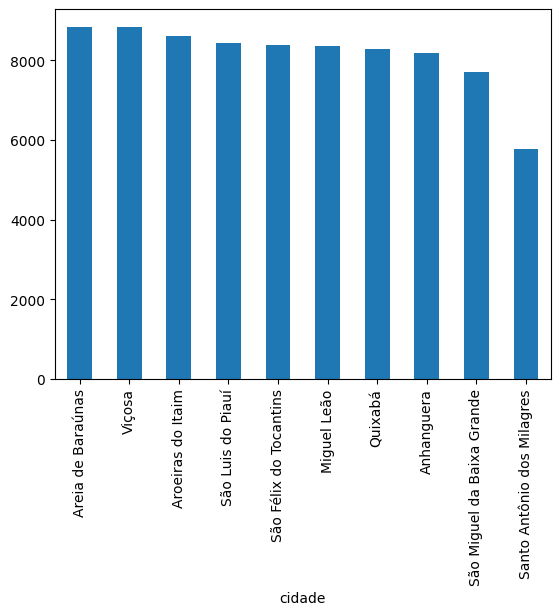

In [28]:
# código para gerar a visualização
cidades_menos_pop = brasil_df.sort_values(by='populacao',ascending=False).tail(10)

# fiz o ascending=False e peguei os dados pelo fim do dataframe para ordenar o grafico
# apresentando a mais populosa para a menos populosa
cidades_menos_pop.plot.bar(x='cidade',y='populacao',legend=False)

 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

In [29]:
# verificando quais os indices de regioes do brasil_df
regioes_serie = brasil_df['regiao']
regioes_lista = list(set(regioes_serie))
regioes_lista

['SUDESTE', 'NORTE', 'NORDESTE', 'CENTRO-OESTE', 'SUL']

In [30]:
brasil_df = pd.read_csv('brasil.csv')

<Axes: ylabel='populacao'>

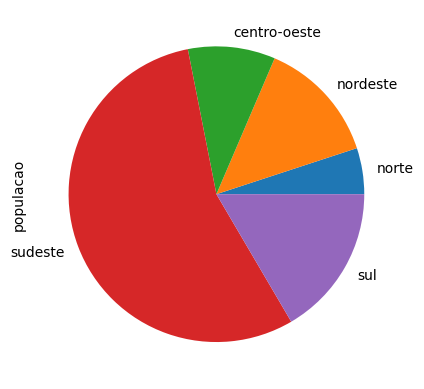

In [31]:
# somando a quantidade de populacao em cada regiao
pop_norte = brasil_df.loc[brasil_df['regiao'] == 'NORTE']['populacao'].agg('sum').round(1)
pop_nordeste = brasil_df.loc[brasil_df['regiao'] == 'NORDESTE']['populacao'].agg('sum').round(1)
pop_centro = brasil_df.loc[brasil_df['regiao'] == 'CENTRO-OESTE']['populacao'].agg('sum').round(1)
pop_sudest = brasil_df.loc[brasil_df['regiao'] == 'SUDESTE']['populacao'].agg('sum').round(1)
pop_sul = brasil_df.loc[brasil_df['regiao'] == 'SUL']['populacao'].agg('sum').round(1)

# adicionando os valores arredondados das populacoes neste dict e gerando um dataframe dele
dict_pop = {
    'norte':pop_norte,
    'nordeste':pop_nordeste,
    'centro-oeste':pop_centro,
    'sudeste':pop_sudest,
    'sul':pop_sul
}
populacao_regiao_df = pd.DataFrame(pd.Series(dict_pop), columns=['populacao'])
populacao_regiao_df.index.name = 'regiao'

# gerando o gráfico de pizza
populacao_regiao_df.plot.pie(y='populacao',legend=False)

EXTRA - Criando o gráfico de pizza usando `groupby()` para agrupar a populacao de cada regiao, de forma mais ágil

<Axes: ylabel='populacao'>

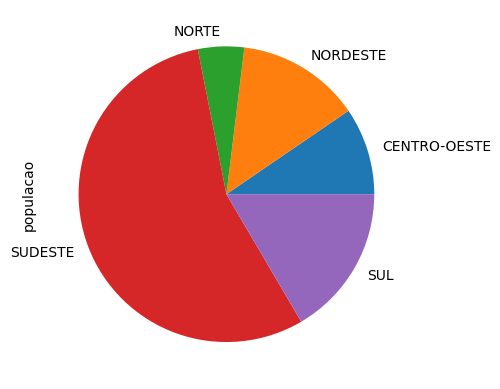

In [32]:
# groupby() agrupa a populacao por regiao, no novo df definido logo abaixo
df_pop_regioes = brasil_df[['regiao','populacao']].groupby('regiao').agg('sum').reset_index()

# depois, so gerar o grafico
# o labels é onde define o nome de cada seção do grafico
df_pop_regioes.plot.pie(y='populacao',labels=df_pop_regioes['regiao'],legend=False)